<a href="https://colab.research.google.com/github/yoojinlee-hub/DALC_Scala/blob/main/7%EC%A3%BC%EC%B0%A8_KMOOC_%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**빅데이터 회귀 분석**

*   빅데이터 분석에 활용되는 머신러닝 기법
*   머신러닝:데이터과학의 계산 및 알고리즘 기술이 데이터 과학의 통계적 사고와 결합되는 지점. 추론과 데이터 탐색 방식을 다룸/인공지능의 하위 분야/*데이터 모델을 구축하는 체계적인 수단*
*  **Scikit-Learn API**




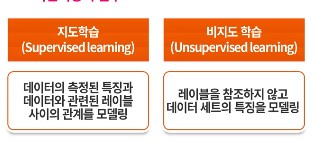

회계분석<지도학습
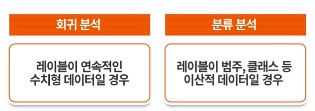



---



머신러닝의 핵심: 데이터로부터 모델을 만드는 학습과정 - 컴퓨터가 이해할 수 있게 데이터를 표현해야함

!Scikit-Learn!
*  데이터테이블 관점으로 이해 
*   2차원 데이터 구조. 엑셀의 시트와 동일
*  행은 데이터 세트의 개별 요소(개체)
* 열은 개별요소의 특징을 나타내는 변수



In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head(4) //특징행렬

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa


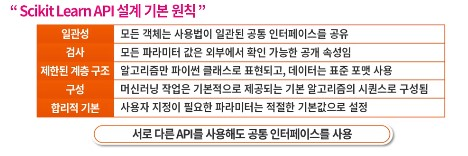

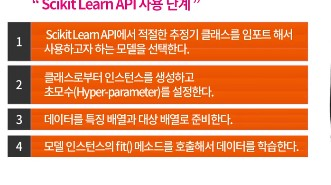

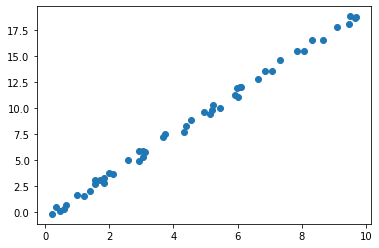

In [3]:
import matplotlib.pyplot as plt
import numpy as np

rng=np.random.RandomState(42)
x=10*rng.rand(50)
y=2*x-1+rng.rand(50)
plt.scatter(x,y);

모델 클래스 선택: from sklearn.linear_model import LinerRegression

모델 초모수 선택: model= LinearRegression(fit_intercept=True) //절편사용유뮤

In [ ]:
 model= LinearRegression(fit_intercept=True)

데이터 차원 변경 :(1차원 to 2차원)

1.   X=x[:,np.newaxis] X.shape
2.   X=x.reshape(50,1) X.shape



모델에 데이터 적용: model.fit(X,y)

모델확인: print(model.coef_)

In [ ]:
print(model.coef_)
print(model.intercept_)

모델의 정확도 확인:model.score(X,y)

모델시각화

In [ ]:
xfit=np.linspace(-1,11)
plt.scatter(x,y)
plt.plot(xfit,model.coef_*xfit+model.intercept_,'-r')



---



**최적의 모델을 선택하는 방법, 다항식 회귀 모델, 학습곡선**
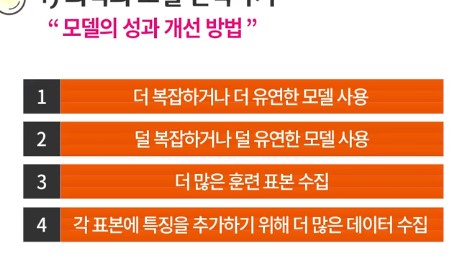

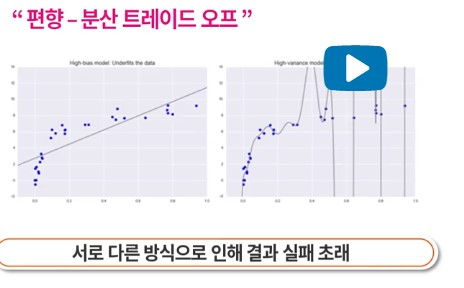

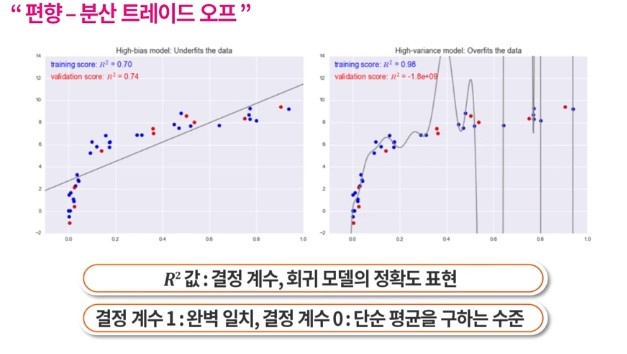

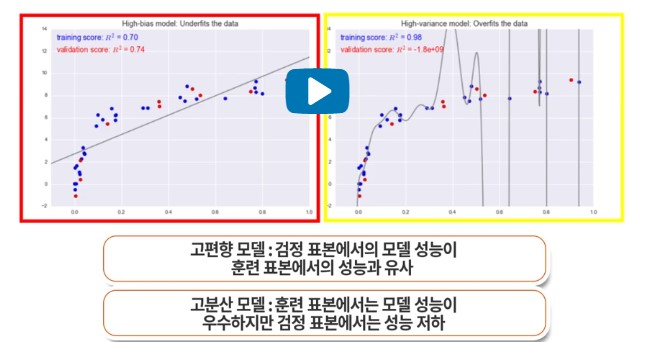

고편향과 고분산이 절충되어야 함//
다항식의 차수가 높아질수록 모델의 복잡도가 높아짐

**파이프라인**<br>
전처리 프로그램과 선형 회귀 모델을 묶어주는 프로그램

In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialFeatures(degree=2,**kwargs):
  return make_pipeline(PolynomialFeatures(degree),LinearRegression(**kwargs))

In [15]:
import numpy as np

def make_data(N,err=1.0,rseed=1):
  rng=np.random.RandomState(rseed)
  X=rng.rand(N)**2
  y=10-1./(X+0.1)
  if err>0:
    y+=err*rng.randn(N)
    return X,y

  X,y=make_data(40)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn;seaborn.set()

X_test=np.linspace(-0.1,1.1,500)
plt.scatter(X,y,color='black')
axis=plt.axis()

데이터 적합

In [ ]:
plt.scatter(X,y,color='black')

for degree in [1,2,3]: 
  model=PolynomialRegression(degree)
  model.fit(X[:,np.newaxis],y)
  y_test=model.predict(X_test[:,np.newaxis])
  plt.plot(X_test,y_test,label=f'Degree={degree}')

  plt.axis([-0.1,1.0,-2,12])
  plt.legend(loc='best')

데이터 검증 곡선
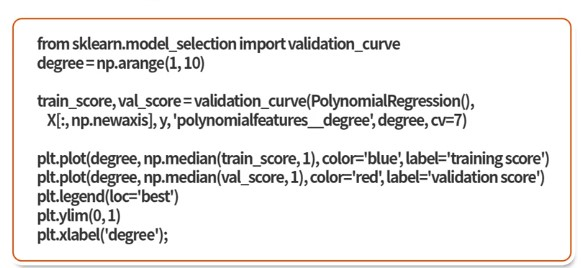